## Dataset (Load , exploration and  Cleaning)


In [1]:
# calculations and Dataframe
import pandas as pd
import numpy as np

# plot facial expression 
from matplotlib import pyplot as plt
from skimage import io

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras


d:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# load dataset
dataset_facial_expression = pd.read_csv("../fer2013.csv")


#### Data exploration

In [3]:
# display the top five
dataset_facial_expression.head()


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [4]:
# display the last five
dataset_facial_expression.tail()


,emotion,pixels,Usage
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest
35886,2,19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...,PrivateTest


#### Detecting missing, nan or null

In [5]:
# Summary statistics: Numeric data
dataset_facial_expression.describe()


,emotion
count,35887.000000
mean,3.323265
std,1.873819
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,6.000000


In [6]:
dataset_facial_expression.shape

(35887, 3)

In [7]:
dataset_facial_expression.columns

Index(['emotion', 'pixels', 'Usage'], dtype='object')

In [8]:
dataset_facial_expression.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
emotion    35887 non-null int64
pixels     35887 non-null object
Usage      35887 non-null object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [123]:
dataset_facial_expression.isna()


,emotion,pixels,Usage
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


#### Data Exploration and plot pixels

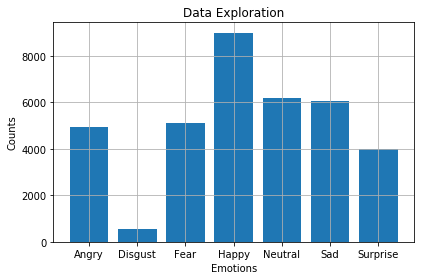

,emotion,count
3,Happy,8989
6,Neutral,6198
4,Sad,6077
2,Fear,5121
0,Angry,4953
5,Surprise,4002
1,Disgust,547


In [110]:
delais_emotion_label = ("Happy" , "Neutral", "Sad", "Fear" , "Angry", "Surprise" ,"Disgust")
delais_emotion = pd.DataFrame(data=dataset_facial_expression["emotion"].value_counts())

delais_emotion["count"] = delais_emotion["emotion"]
delais_emotion["emotion"] = delais_emotion_label
delais_emotion
%matplotlib inline
fig, ax = plt.subplots()

ax.bar(delais_emotion["emotion"], delais_emotion["count"] )
ax.set_title("Data Exploration")
ax.set_ylabel("Counts")
ax.set_xlabel("Emotions")
ax.grid()

fig.tight_layout()
plt.show()
delais_emotion


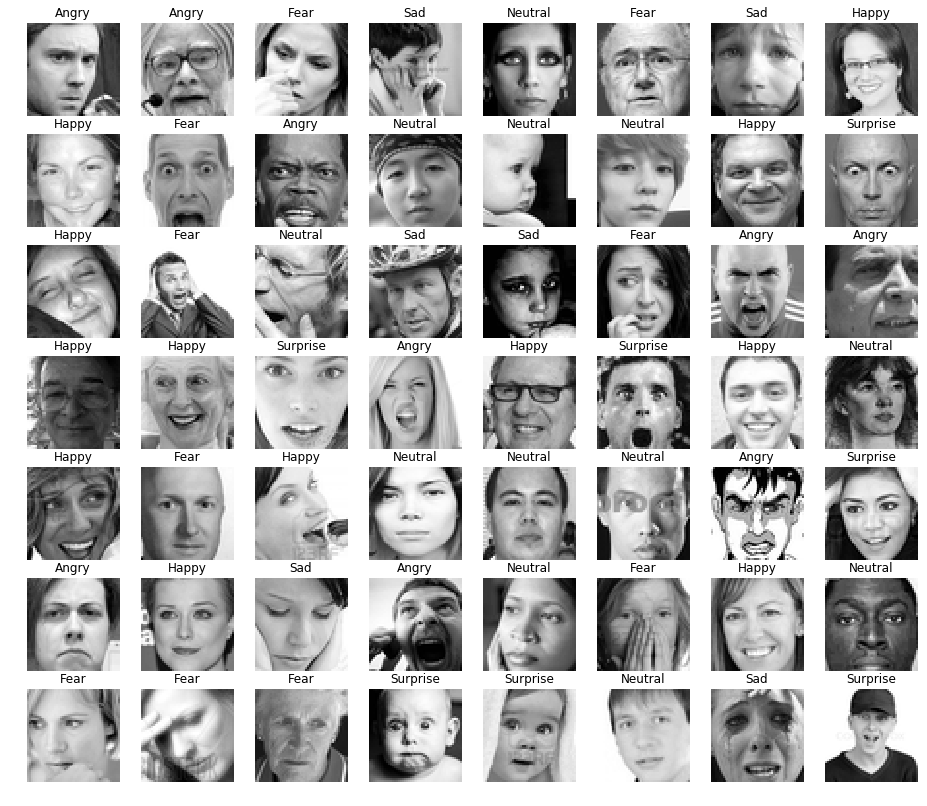

In [172]:
plt.figure(figsize=(16,16))

for i in range(56):
    imagen = dataset_facial_expression["pixels"][0+i]
    imagen_list_pixel = imagen.split(" ")
    imagen_array_pixel = np.asarray(imagen_list_pixel, dtype=float)
    imagen_rezise_pixel = imagen_array_pixel.reshape(-1,48,48)
    plt.subplot(8,8,1+i)
    
    if (dataset_facial_expression["emotion"][0+i]==0):
        plt.title("Angry")
    elif (dataset_facial_expression["emotion"][0+i]==1):
        plt.title("Disgust")
    elif (dataset_facial_expression["emotion"][0+i]==2):
        plt.title("Fear")
    elif (dataset_facial_expression["emotion"][0+i]==3):
        plt.title("Happy")
    elif (dataset_facial_expression["emotion"][0+i]==4):
        plt.title("Sad") 
    elif (dataset_facial_expression["emotion"][0+i]==5):
        plt.title("Surprise") 
    else:
        plt.title("Neutral") 
    plt.axis("off")        
    plt.imshow(imagen_rezise_pixel[0],cmap='gray')
plt.show()
